# Кредитный отдел банка

# Задача

Заказчик — кредитный отдел банка. 

Цель исследования: 

    Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

Импортируем необходимые для работы библиотеки.

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Посмотрим первые и последние строки таблицы.

In [1]:
try:
    df = pd.read_csv('/datasets/data.csv')
except Exception:
    ! gdown --id 1cisrVqr8UA0KAuWGm8cZTA7BzKwIpN-L
    df = pd.read_csv('/content/data.csv')

display(df.head(10))
display(df.tail(10))

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cisrVqr8UA0KAuWGm8cZTA7BzKwIpN-L
To: /content/data.csv
100% 3.32M/3.32M [00:00<00:00, 186MB/s]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Выясняем, что за данные представлены в столбцах.

#### Описание данных
	• children — количество детей в семье
	• days_employed — общий трудовой стаж в днях
	• dob_years — возраст клиента в годах
	• education — уровень образования клиента
	• education_id — идентификатор уровня образования
	• family_status — семейное положение
	• family_status_id — идентификатор семейного положения
	• gender — пол клиента
	• income_type — тип занятости
	• debt — имел ли задолженность по возврату кредитов
	• total_income — ежемесячный доход
	• purpose — цель получения кредита

Замечания для первичных исправлений:

	• названия столбцов не информативны
	• стаж работы отрицательным быть не должен
	• привести образование к единому формату
    
Можно, конечно, это в соответствующих разделах выполнить.
Но зачем откладывать на потом то, что можно сделать сейчас? Если оно не долго.

Проверяем названия столбцов таблицы df на лишние пробелы.

In [2]:
print(df.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')


Вроде все ровно.

Стаж отрицательным быть не может. В "days_employed" берем значения по модулю.

In [3]:
df['days_employed'] = df['days_employed'].abs()

В "education" выравниваем шрифт.

In [4]:
df['education'] = df['education'].str.lower()

Делаем шапку приятной глазу и не ломающей мозг.

In [5]:
df_rus = df.rename(columns={'children': 'дети',
                            'days_employed': 'стаж',
                            'dob_years': 'возраст',
                            'education': 'образование',
                            'education_id': 'id_образ.',
                            'family_status': 'семей_полож',
                            'family_status_id': 'id_сем_полож',
                            'gender': 'пол',
                            'income_type': 'занятость',
                            'debt': 'задолженность',
                            'total_income': 'доход',
                            'purpose': 'цель'})

###### df_rus

Смотрим результат:

In [6]:
display(df_rus.head(10))
display(df_rus.tail(10))

,дети,стаж,возраст,образование,id_образ.,семей_полож,id_сем_полож,пол,занятость,задолженность,доход,цель
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,дети,стаж,возраст,образование,id_образ.,семей_полож,id_сем_полож,пол,занятость,задолженность,доход,цель
21515,1,467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,среднее,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Получаем общую информацию о данных в таблице df:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Есть пропуски в

	• days_employed (стаж)
	• total_income (доход)

### Предобработка данных

#### Шаг 2.1 Заполнение пропусков

Считаем пропуски в данных:

In [8]:
print(df.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Доля пропусков:

In [9]:
print('Cтаж не заполнен на', '{0:.2%}'.format(1-(df['days_employed'].count() / df['children'].count())))
print('Доход не заполнен на', '{0:.2%}'.format(1-(df['total_income'].count() / df['children'].count())))

Cтаж не заполнен на 10.10%
Доход не заполнен на 10.10%


Кто-то шифруется и не все о себе сообщает?

Интересно, что пропусков одинаковое количество. Должно быть источников ошибок = 1шт.

Пропусков многовато, удалять строки нельзя, заменим на медианы.

Дозаполняем days_employed:

In [10]:
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].median())

Дозаполняем total_income:

In [12]:
for income in df['income_type'].unique():
    for edu in df['education'].unique():
        median_value = df[(df['income_type'] == income) & 
                          (df['education'] == edu)]['total_income'].median()
        df.loc[(df['income_type'] == income) & 
               (df['education'] == edu), 'total_income'] = df.loc[(df['income_type'] == income) & 
                                                                  (df['education'] == edu), 'total_income'].fillna(median_value)

Проверим что получилось:

In [13]:
print('Cтаж не заполнен на', '{0:.2%}'.format(1-(df['days_employed'].count() / df['children'].count())))
print('Доход не заполнен на', '{0:.2%}'.format(1-(df['total_income'].count() / df['children'].count())))

Cтаж не заполнен на 0.00%
Доход не заполнен на 0.00%


Смотрим зависимости Дохода от других параметров:

In [16]:
display(df.groupby('debt')['total_income'].agg(['count','median']))
display(df.groupby('children')['total_income'].agg(['count','median']))
#display(df.groupby('education')['total_income'].agg(['count','median']))
#display(df.groupby('family_status')['total_income'].agg(['count','median']))
display(df.groupby('gender')['total_income'].agg(['count','median']))
display(df.groupby('income_type')['total_income'].agg(['count','median']))
#display(df.groupby('purpose')['total_income'].agg(['count','median']))

,count,median
debt,,
0,19784,143937.391338
1,1741,140402.515977


,count,median
children,,
-1,47,143008.454914
0,14149,141671.244873
1,4818,147957.849190
2,2055,143950.715687
3,330,153278.134043
4,41,153263.850194
5,9,168460.926969
20,76,144036.994898


,count,median
gender,,
F,14236,136555.108821
M,7288,163206.842991
XNA,1,203905.157261


,count,median
income_type,,
безработный,2,131339.751676
в декрете,1,53829.130729
госслужащий,1459,148978.800029
компаньон,5085,170155.716801
пенсионер,3856,114842.854099
предприниматель,2,499163.144947
сотрудник,11119,138068.631966
студент,1,98201.625314


#### Шаг 2.2 Проверка данных на аномалии и исправления

Аномалия с отрицательными стажами была исправена ранее.

Проверяем остальные столбцы.

##### дети / children

In [17]:
display('children:', df['children'].unique())

'children:'

array([ 1,  0,  3,  2, -1,  4, 20,  5])

"-1" ребенок? Да и 20 - не обычно (бывает, конечно, но не в таких пропорциях)

Количество таких ошибок:

In [18]:
print('Количество значений "-1":', df[df['children'] == -1]['children'].count())
print('Количество значений "20":', df[df['children'] == 20]['children'].count())

Количество значений "-1": 47
Количество значений "20": 76


47 и 76. Многовато повторов для случайности. Хорошобы узнать ID операторов заполнения. Вдруг источник определится.

Посмотрим распределение:

In [19]:
display(df.groupby('children')['children'].count())

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

Ошибки заменим на медианы, чтобы не получить "среднюю температуру по больнице":

In [20]:
df['children'] = df['children'].replace([-1, 20], df['children'].median())

Проверка:

In [21]:
print('Проверка', df.groupby('children')['children'].count())

Проверка children
0.0    14272
1.0     4818
2.0     2055
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64


##### стаж / days_employed

In [22]:
display('days_employed:', df['days_employed'].sort_values().unique())

'days_employed:'

array([2.41416332e+01, 2.42406948e+01, 3.01953372e+01, ...,
       4.01675093e+05, 4.01715812e+05, 4.01755400e+05])

Разброс от 24 до 400000 дней?

Судя по значениям оно автоматически вычисляется  и чего то не так высчитывается. В сутках 86400 секунд. Т.е. указывается точность до тысячных долей секунд.

А может это в часах, а не днях. Потому что 4.01755400e+05 дней - это более 1100 лет без учета выходных и праздников. Но тогда 24 часа - это сутки или 3 дня по 8 часов?

##### возраст / dob_years

In [23]:
display('dob_years:', df['dob_years'].sort_values().unique())

'dob_years:'

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

"0" лет маловато для "попросить кредит".

Количество таких ошибок:

In [24]:
print('Количество значений "0":', df[df['dob_years'] == 0]['dob_years'].count())

Количество значений "0": 101


101 ошибку заменим на медианы:

In [25]:
df['dob_years'] = df['dob_years'].replace([0], df['dob_years'].median())
display('(проверка) dob_years:', df['dob_years'].sort_values().unique())

'(проверка) dob_years:'

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75.])

##### образование / education

In [26]:
display('education:', df['education'].sort_values().unique())

'education:'

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

##### id_образ / education_id

In [28]:
display('education_id:', df['education_id'].unique())

'education_id:'

array([0, 1, 2, 3, 4])

##### семей_полож / family_status

In [29]:
display('family_status:', df['family_status'].unique())

'family_status:'

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Буквы в разном регистре. Исправляем:

In [30]:
df['family_status'] = df['family_status'].str.lower()

Проверяем:

In [31]:
display('family_status:', df['family_status'].unique())

'family_status:'

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

##### id_сем_полож / family_status_id

In [32]:
display('family_status_id:', df['family_status_id'].unique())

'family_status_id:'

array([0, 1, 2, 3, 4])

##### пол / gender

In [33]:
display('gender:', df['gender'].unique())

'gender:'

array(['F', 'M', 'XNA'], dtype=object)

"XNA" - что это?

Количество таких ошибок:

In [34]:
print('Количество значений "XNA":', df[df['gender'] == 'XNA']['gender'].count())

Количество значений "XNA": 1


1 шт сочтем за опечатку. Исправим:

In [35]:
df['gender']=df['gender'].replace('XNA', 'unknown')
print('Проверка gender:', df['gender'].unique())

Проверка gender: ['F' 'M' 'unknown']


##### занятость / income_type

In [36]:
display('income_type:', df['income_type'].unique())

'income_type:'

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

##### задолженность / debt

In [37]:
display('debt:', df['debt'].unique())

'debt:'

array([0, 1])

##### доход / total_income

In [38]:
display('total_income:', df['total_income'].sort_values().unique())

'total_income:'

array([  20667.26379327,   21205.28056622,   21367.64835649, ...,
       1726276.01433167, 2200852.2102589 , 2265604.02872274])

##### цель / purpose

In [39]:
display('purpose:', df['purpose'].sort_values().unique())

'purpose:'

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

Не красиво.

Надо бы списочком вывести, чтобы удобнее читалось.

In [40]:
display('purpose:')
loc = df['purpose'].sort_values().unique()
for i in range(len(loc)):
    print(loc[i])

'purpose:'

автомобили
автомобиль
высшее образование
дополнительное образование
жилье
заняться высшим образованием
заняться образованием
на покупку автомобиля
на покупку подержанного автомобиля
на покупку своего автомобиля
на проведение свадьбы
недвижимость
образование
операции с жильем
операции с коммерческой недвижимостью
операции с недвижимостью
операции со своей недвижимостью
покупка жилой недвижимости
покупка жилья
покупка жилья для сдачи
покупка жилья для семьи
покупка коммерческой недвижимости
покупка недвижимости
покупка своего жилья
получение высшего образования
получение дополнительного образования
получение образования
приобретение автомобиля
профильное образование
ремонт жилью
свадьба
свой автомобиль
сделка с автомобилем
сделка с подержанным автомобилем
строительство жилой недвижимости
строительство недвижимости
строительство собственной недвижимости
сыграть свадьбу


Цели можно и унифицировать, если понадобяться для выборок. Тут определенно излишне накреативили с названиями.

#### Шаг 2.3. Изменение типов данных

Количество знаков после запятой в колонке доход превышает количество копеек в рубле. Данные зашифрованы или кто-то имеет гешефт с округления? 

Изменим формат дохода (`total_income`) на целочисленные значения, предварительно удалив пропуски.

In [41]:
df['total_income'] = df['total_income'].fillna(df['total_income'].median())
df['total_income'] = df['total_income'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


#### Шаг 2.4. Удаление дубликатов

Вначале были правки в образовании.

Можно еще цели унифицировать, но по заданию пока не требуется.

На всякий случай проведем удаление дубликатов:

In [42]:
df = df.drop_duplicates().reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             21453 non-null  int64  
 1   children          21453 non-null  float64
 2   days_employed     21453 non-null  float64
 3   dob_years         21453 non-null  float64
 4   education         21453 non-null  object 
 5   education_id      21453 non-null  int64  
 6   family_status     21453 non-null  object 
 7   family_status_id  21453 non-null  int64  
 8   gender            21453 non-null  object 
 9   income_type       21453 non-null  object 
 10  debt              21453 non-null  int64  
 11  total_income      21453 non-null  int64  
 12  purpose           21453 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


А строчек то подуменьшилось.

#### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим словарь education_id / education:

In [44]:
stocks_ed = df['education'].unique()
prices_ed = df['education_id'].unique()
education_dict = dict(zip(stocks_ed, prices_ed))
display('education и education_id:', education_dict)

'education и education_id:'

{'высшее': 0,
 'начальное': 3,
 'неоконченное высшее': 2,
 'среднее': 1,
 'ученая степень': 4}

Создадим словарь family_status_id / family_status:

In [45]:
stocks_fam = df['family_status'].unique()
prices_fam = df['family_status_id'].unique()
family_dict = dict(zip(stocks_fam, prices_fam))
display('family_status и family_status_id:', family_dict)

'family_status и family_status_id:'

{'в разводе': 3,
 'вдовец / вдова': 2,
 'гражданский брак': 1,
 'женат / замужем': 0,
 'не женат / не замужем': 4}

Сделаем датафреймы 

*   education_id / education
*   family_status_id / family_status

In [46]:
my_df_ed = pd.DataFrame(list(zip(stocks_ed, prices_ed)), columns = ['education', 'education_id'])
my_df_fam = pd.DataFrame(list(zip(stocks_fam, prices_fam)), columns = ['family_status', 'family_status_id'])
display(my_df_ed)
print()
display(my_df_fam)

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


Удаляем из исходного датафрейма столбцов education и family_status за ненадобностью.

In [47]:
del df['education']
del df['family_status']
display(df)

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1.0,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья
1,1,1.0,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,2,0.0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья
3,3,3.0,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование
4,4,0.0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...
21448,21520,1.0,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем
21449,21521,0.0,343937.404131,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем
21450,21522,1.0,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость
21451,21523,3.0,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля


#### Шаг 2.6. Категоризация целей кредита

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

		○ ‘операции с автомобилем’,
		○ ‘операции с недвижимостью’,
		○ ‘проведение свадьбы’,
		○ ‘получение образования’.

Например, если в столбце `purpose` находится подстрока 'на покупку автомобиля', то в столбце `purpose_category` должна появиться строка 'операции с автомобилем'.

In [48]:
def purpose_category_fun(row):
    """
    Функция, которая на основании данных из столбца purpose 
    формирует новый столбец purpose_category, в который войдут 
    следующие категории:
		○ ‘операции с автомобилем’,
		○ ‘операции с недвижимостью’,
		○ ‘проведение свадьбы’,
		○ ‘получение образования’.
    """
    purpose = row['purpose']
    if 'авто' in purpose:
        return 'авто'
    if 'недвиж' in purpose:
        return 'недвижимость'
    if 'жиль' in purpose:
        return 'недвижимость'
    if 'свад' in purpose:
        return 'свадьба'
    if 'образ' in purpose:
        return 'образование'
    return 'Такого варианта не предусмотрено'

Дополним df с помощью созданной функции:

In [49]:
row = pd.Series(df['purpose'])
df['purpose_category'] = df.apply(purpose_category_fun, axis=1)

Смотрим результат:

In [50]:
display(df.head(5))

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,0,1.0,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,1.0,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,авто
2,2,0.0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,3.0,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,образование
4,4,0.0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


Посмотрим какие значения понавставлялись:

In [51]:
print(df.groupby('purpose_category')['purpose_category'].count())

purpose_category
авто             4306
недвижимость    10811
образование      4013
свадьба          2323
Name: purpose_category, dtype: int64


Все учли. Варианта "Такого варианта не предусмотрено" не появилось.

#### Шаг 2.7. Категоризация дохода

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:

		○ 0–30000 — 'E';
		○ 30001–50000 — 'D';
		○ 50001–200000 — 'C';
		○ 200001–1000000 — 'B';
		○ 1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'D', а клиенту, получающему 235000, — 'A'.

In [52]:
def total_income_category_fun(row):
    """
    Функция, которая на основании диапазонов, указанных ниже, 
    создает столбец total_income_category с категориями:
		○ 0–30000 — 'E';,
		○ 30001–50000 — 'D';
		○ 50001–200000 — 'C';
		○ 200001–1000000 — 'B';
		○ 1000001 и выше — 'A'.
    """
    total_income = row['total_income']
    if total_income >= 0:
        if total_income <= 30000:
            row['total_income_category'] = 'E'
        elif total_income <= 50000:
            row['total_income_category'] = 'D'
        elif total_income <= 200000:
            row['total_income_category'] = 'C'
        elif total_income <= 1000000:
            row['total_income_category'] = 'B'
        elif total_income > 1000000:
            row['total_income_category'] = 'A'
    else:
        row['total_income_category'] = 'NaN'
    return row

Заполним df с помощью новой функции:

In [54]:
df = df.apply(total_income_category_fun, axis=1)
display(df.head(5))

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,0,1.0,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,недвижимость,B
1,1,1.0,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,авто,C
2,2,0.0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,недвижимость,C
3,3,3.0,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,образование,B
4,4,0.0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,C


Чего то столбцы не по порядку: для `total_income_category` место рядом с `total_income`. Меняем:

In [56]:
df = df[['index', 'children', 'days_employed', 'dob_years',
         'education_id', 'family_status_id', 'gender', 'income_type', 
         'debt', 'total_income', 'total_income_category', 'purpose', 
         'purpose_category']]
display(df.head(5))

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,total_income_category,purpose,purpose_category
0,0,1.0,8437.673028,42.0,0,0,F,сотрудник,0,253875,B,покупка жилья,недвижимость
1,1,1.0,4024.803754,36.0,1,0,F,сотрудник,0,112080,C,приобретение автомобиля,авто
2,2,0.0,5623.422610,33.0,1,0,M,сотрудник,0,145885,C,покупка жилья,недвижимость
3,3,3.0,4124.747207,32.0,1,0,M,сотрудник,0,267628,B,дополнительное образование,образование
4,4,0.0,340266.072047,53.0,1,1,F,пенсионер,0,158616,C,сыграть свадьбу,свадьба


Проверим новые параметры:

In [57]:
print(df.groupby('total_income_category')['total_income_category'].count())

total_income_category
A       25
B     5228
C    15828
D      350
E       22
Name: total_income_category, dtype: int64


Все посчитали. Варианта "NaN" не появилось.

### Ответы на вопросы

#### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Посмотрим циферки, чтобы небыло неожиданностей:

In [69]:
print(df.groupby('children')['children'].count())
print()
print(df.groupby('debt')['debt'].count())

children
0.0    14213
1.0     4808
2.0     2052
3.0      330
4.0       41
5.0        9
Name: children, dtype: int64

debt
0    19712
1     1741
Name: debt, dtype: int64


Посчитаем процент проблем с возвратом от количества детей:

In [66]:
df_pivot_child = df.pivot_table(index='children',
                                columns='debt',
                                values='gender',
                                aggfunc='count').sort_values(by='children',
                                                             ascending = True)
df_pivot_child['debtors, %'] = df_pivot_child[1] / (df_pivot_child[0] + df_pivot_child[1]) * 100
df_pivot_child = df_pivot_child.fillna(0)
df_pivot_child

debt,0,1,"debtors, %"
children,,,
0.0,13141.0,1072.0,7.542391
1.0,4364.0,444.0,9.234609
2.0,1858.0,194.0,9.454191
3.0,303.0,27.0,8.181818
4.0,37.0,4.0,9.756098
5.0,9.0,0.0,0.000000


Посмотрим картинки:

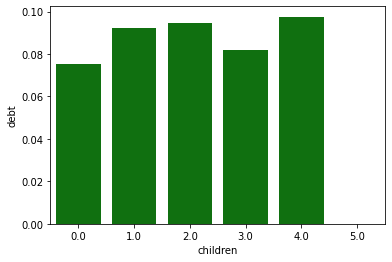

In [71]:
plt.show(sns.barplot(x=df['children'],
                     y=df['debt'],
                     ci=None,
                     color='green'))

Странный провал при 5 детях. Посмотрим табличку:

In [72]:
display(df[df['children'] == 5])

,index,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,total_income_category,purpose,purpose_category
3977,3979,5.0,2194.220567,42.0,1,1,M,сотрудник,0,136555,C,на покупку своего автомобиля,авто
4394,4397,5.0,3248.839837,36.0,1,0,F,компаньон,0,168460,C,операции с недвижимостью,недвижимость
7859,7866,5.0,773.124856,36.0,1,0,F,сотрудник,0,48772,D,операции с жильем,недвижимость
15786,15822,5.0,418.199982,31.0,1,0,F,сотрудник,0,77552,C,сделка с подержанным автомобилем,авто
15880,15916,5.0,2286.262752,37.0,1,0,F,сотрудник,0,256698,B,покупка недвижимости,недвижимость
16172,16211,5.0,387.317579,35.0,1,1,F,госслужащий,0,126102,C,на проведение свадьбы,свадьба
20386,20452,5.0,268.425464,38.0,3,0,F,сотрудник,0,212545,B,заняться высшим образованием,образование
20769,20837,5.0,2386.600221,35.0,1,0,F,компаньон,0,204241,B,жилье,недвижимость
21086,21156,5.0,1690.018117,59.0,1,0,M,сотрудник,0,269068,B,операции со своей недвижимостью,недвижимость


Реально беспроблемные. Правда выборка маловата.

##### Ответ 1

1. Похоже, что увеличение количества детей повышает риски возникновения проблем с возвратом кредита.


2. Исключением является наличие 3 детей. Тут наблюдается небольшой провал восходящего графика. Можно посоветоваться с психологами, тут может быть результат связан с ответственностью.


3. Результат при количестве детей равное 5, скорее всего не репрезентативен из-за малой выборки. Но, может быть, такой вариант и правда безпроблемный. Хотя и вряд ли.


#### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [73]:
print(df.groupby('family_status_id')['family_status_id'].count())
print()
print(df.groupby('debt')['debt'].count())

family_status_id
0    12339
1     4150
2      959
3     1195
4     2810
Name: family_status_id, dtype: int64

debt
0    19712
1     1741
Name: debt, dtype: int64


Посчитаем возврат от семейного положения:

In [78]:
df_pivot_fam_st_id = df.pivot_table(index='family_status_id',
                                    columns='debt',
                                    values='gender',
                                    aggfunc='count').sort_values(by='family_status_id',
                                                                 ascending = True)
df_pivot_fam_st_id['debtors, %'] = df_pivot_fam_st_id[1] / (df_pivot_fam_st_id[0] + df_pivot_fam_st_id[1]) * 100
df_pivot_fam_st_id

debt,0,1,"debtors, %"
family_status_id,,,
0,11408,931,7.545182
1,3762,388,9.349398
2,896,63,6.569343
3,1110,85,7.112971
4,2536,274,9.750890


Что означают непонятные family_status_id?

In [79]:
display(my_df_fam)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


График:

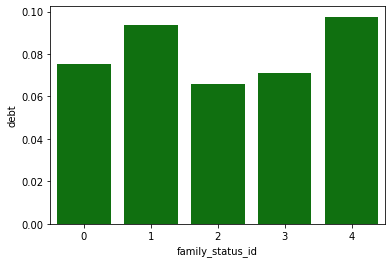

In [80]:
plt.show(sns.barplot(x=df['family_status_id'],
                     y=df['debt'],
                     ci=None,
                     color='green'))

##### Ответ 2
1. Статусы надежности семейного положения в свете возврата кредита:
		1.1. вдовец / вдова
		1.2. в разводе
		1.3. женат / замужем
		1.4. гражданский брак
		1.5. не женат / не замужем
2. Получается наиболее надежные платильщики - имевшие **опыт** проживания в браке.

3. Штамп в паспорте повышает надежность.

4. Кто помалкивает даже про гражданский брак - наименее надежные.

#### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [81]:
print(df.groupby('total_income_category')['total_income_category'].count())
print()
print(df.groupby('debt')['debt'].count())

total_income_category
A       25
B     5228
C    15828
D      350
E       22
Name: total_income_category, dtype: int64

debt
0    19712
1     1741
Name: debt, dtype: int64


Посчитаем возврат от уровня дохода:

In [83]:
df_pivot_tot_ince_cat = df.pivot_table(index='total_income_category',
                                       columns='debt',
                                       values='gender',
                                       aggfunc='count').sort_values(by='total_income_category',
                                                                    ascending = True)
df_pivot_tot_ince_cat['debtors, %'] = df_pivot_tot_ince_cat[1] / (df_pivot_tot_ince_cat[0] + df_pivot_tot_ince_cat[1]) * 100
df_pivot_tot_ince_cat

debt,0,1,"debtors, %"
total_income_category,,,
A,23,2,8.000000
B,4864,364,6.962510
C,14476,1352,8.541825
D,329,21,6.000000
E,20,2,9.090909


Опять непонятные значения. Добавляем:

Напоминалка:
 ○ 0–30000 — 'E';
 ○ 30001–50000 — 'D';
 ○ 50001–200000 — 'C';
 ○ 200001–1000000 — 'B';
 ○ 1000001 и выше — 'A'.



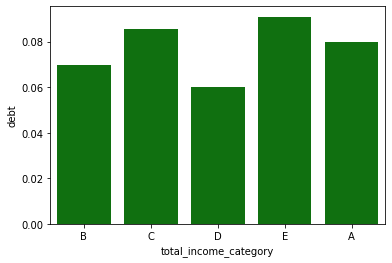

In [82]:
print("Напоминалка:\n ○ 0–30000 — 'E';\n ○ 30001–50000 — 'D';\n ○ 50001–200000 — 'C';\n ○ 200001–1000000 — 'B';\n ○ 1000001 и выше — 'A'.")
print()
plt.show(sns.barplot(x=df['total_income_category'], y=df['debt'], ci=None, color='green'))

##### Ответ 3

1. Зависимость возврата кредита в срезе дохода просматривается. Отсортируем по надежности:
		1.1. 30001–50000
		1.2. 200001–1000000
		1.3. 1000001 и выше
		1.4. 50001–200000
		1.5. 0–30000
2. Реальные зарплаты (категория D п.п.1.1) положительно влияют на возврат средств.

3. У кого малые доходы (п.п. 1.5) похоже самые проблемные. Но берут не часто 20 шт. из 20000.

4. Люди с "хорошими" доходами (1.2) проблем с возвратами, как правило не устраивают.

5. Ну а доходы от 1000 т.р. и выше:
		5.1. Либо врут, а потому не могут вернуть
        5.2. Либо... не спроста они богатые, потому и не вернут
        5.3. Но вообще то, по большей части, человеки хорошие. Не надо в них разочаровываться

#### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

In [84]:
print(df.groupby('purpose_category')['purpose_category'].count())
print()
print(df.groupby('debt')['debt'].count())

purpose_category
авто             4306
недвижимость    10811
образование      4013
свадьба          2323
Name: purpose_category, dtype: int64

debt
0    19712
1     1741
Name: debt, dtype: int64


Посчитаем возврат от целей:

debt,0,1,"debtors, %"
purpose_category,,,
авто,3903,403,9.359034
недвижимость,10029,782,7.233373
образование,3643,370,9.220035
свадьба,2137,186,8.006888


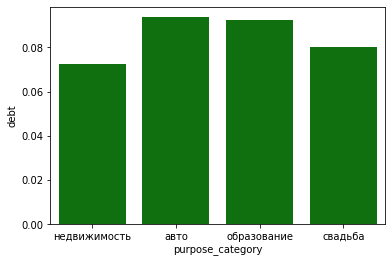

In [86]:
df_pivot_purp_cat = df.pivot_table(index='purpose_category',
                                   columns='debt',
                                   values='gender',
                                   aggfunc='count').sort_values(by='purpose_category',
                                                                ascending = True)
df_pivot_purp_cat['debtors, %'] = df_pivot_purp_cat[1] / (df_pivot_purp_cat[0] + df_pivot_purp_cat[1]) * 100
display(df_pivot_purp_cat)
print()
plt.show(sns.barplot(x=df['purpose_category'], y=df['debt'], ci=None, color='green'))

##### Ответ 4

1. Ранжирование надежности целей кредитования относительно возврата средств:
		1.1. авто
		1.2. образование
		1.3. свадьба
		1.4. недвижимость

2. "Недвижимость" самая надежная. Несмотря на продолжительность возврата.

3. "Авто" и "Образование" не надежны в вопросе возврата. Решение о взятии кредита не достаточно взвешенное?


4. С целью же "Свадьба" определенно понадобятся дополнительные вопросы для минимизации рисков.

5. Со статистикой, конечно, не поспоришь. Но, получившиеся выводы вглядят сомнительно. Возможно предоставленные данные излишне прецизионные.

### Общий вывод:

Цель исследования,- "нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок",- **достигнута**. Указанные параметры влияют на вероятности появления проблем с платежами.

Статистика показывает что
*    увеличение количества детей снижает благонадежность плательщика
*    доверять людям со статусом "вдовец / вдова" (6.57% проблемных) можно больше, чем "не женат / не замужем" (9.75%)

Так же были проверены влияние дохода и целей кредита на возвращение кредитных средств.

*    наименее надежными зарекомендовали себя респонденты с доходом 0–30000 р/мес (9.09%), самыми надежные с доходом 30001–50000 р/мес (6.00%)
*    сомнительной целью кредита является "авто" (9.36%), наибольшую уверенность может обеспечить цель "недвижимость" (7.23%).

Подробнее в промежуточных выводах.

Если отранжировать очередность/значимость полученных выводов, то можно сформулировать задачу построения модели кредитного скоринга.